# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
print(tf.__version__)

2.2.0


## A time series is just a TxD matrix right? 

so instead of the rows, each column is a time series data. Don't worry, lemme explain: 

1 2 3 4 5 6 7 8 9 10 

With T = 2 becomes 

| X1 | X2 | 
|----|----|
| 1 | 2 |
| 2 | 3 |
| 3 | 4 |
| 4 | 5 |
| 5 | 6 |
| 6 | 7 |
| 7 | 8 |
| 8 | 9 |

In [0]:
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, Dense, Flatten
from tensorflow.keras.models import Model


In [45]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [46]:
X_train, X_test = X_train / 255.0 , X_test / 255.0 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [47]:
y_train, y_test = y_train.flatten(), y_test.flatten()
classes = len(set(y_train))
print(classes)

10


In [48]:
input_shape = X_train[0].shape
print(input_shape)


(28, 28)


In [0]:
i_layer = Input(shape = input_shape)
h_layer = LSTM(128)(i_layer)
o_layer = Dense(classes, activation='softmax')(h_layer)
model = Model(i_layer, o_layer)


In [50]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.optimizers.SGD(0.1),
              metrics = ['accuracy'])

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5680 - accuracy: 0.8110 - val_loss: 0.1910 - val_accuracy: 0.9427
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1389 - accuracy: 0.9582 - val_loss: 0.0955 - val_accuracy: 0.9713
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0927 - accuracy: 0.9726 - val_loss: 0.0905 - val_accuracy: 0.9736
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.0809 - val_accuracy: 0.9764
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0819 - val_accuracy: 0.9746
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0600 - val_accuracy: 0.9826
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0627 - val_accuracy:

In [0]:
y_pred = model.predict(X_test).argmax(axis=1) 
# only for sparse categorical crossentropy

In [0]:
labels = list(range(0,10))

In [0]:
def evaluation_tf(report, y_test, y_pred, classes):
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()
  plt.show()

  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()
  plt.show()

  from sklearn.metrics import confusion_matrix
  import itertools
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(10,10))
  plt.imshow(cm, cmap=plt.cm.Blues)
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], 'd'),
            horizontalalignment = 'center',
            color='black')
  plt.xlabel("Predicted labels")
  plt.ylabel("True labels")
  plt.xticks(range(0,classes))
  plt.yticks(range(0,classes))
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.show()

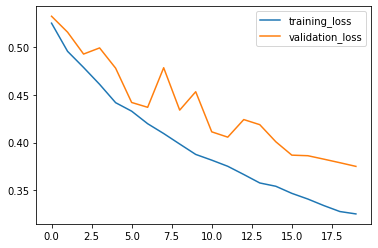

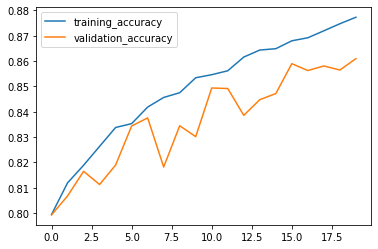

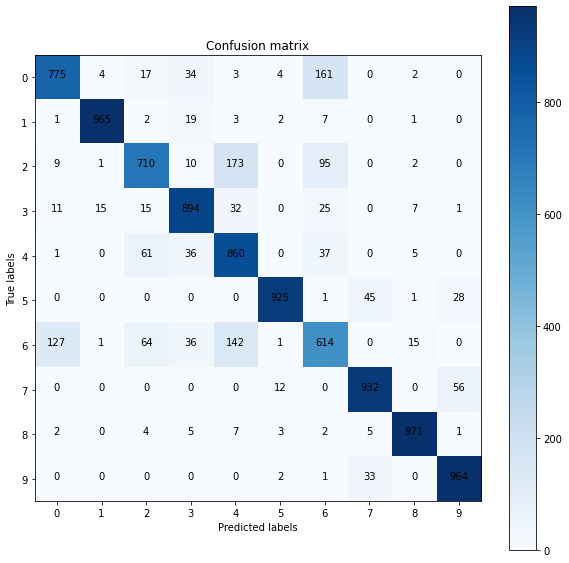

In [0]:
evaluation_tf(report, y_test, y_pred, classes)

Text(0.5, 1.0, 'Predicted = 9, Real = 4')

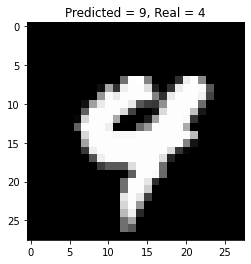

In [55]:
misshits = np.where(y_pred!=y_test)[0]
index = np.random.choice(misshits)
plt.imshow(X_test[index], cmap='gray')
plt.title("Predicted = " + str(labels[y_pred[index]]) + ", Real = " + str(labels[y_test[index]]))